# Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Definition

Let $f(x)$ be a (piecewise) continuous function on the interval $[-L,L]$. The **Fourier series** of $f(x)$ is

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos \left( \frac{n \pi x}{L} \right) + \sum_{n=1}^{\infty} b_n \sin \left( \frac{n \pi x}{L} \right)
$$

where the coefficients are given by the integrals

$$
a_0 = \frac{1}{L} \int_{-L}^L f(x) dx
$$

$$
a_n = \frac{1}{L} \int_{-L}^L f(x) \cos \left( \frac{n \pi x}{L} \right) dx
$$

$$
b_n = \frac{1}{L} \int_{-L}^L f(x) \sin \left( \frac{n \pi x}{L} \right) dx
$$

## Computing Coefficients

Use the SciPy funciton `scipy.integrate.quad` (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)) to numerically approximate a definite integral. For example, let's approximate the integral

$$
\int_0^{1} \sin(x^2) dx
$$

In [2]:
f = lambda x: np.sin(x**2)
a = 0
b = 1
I,error = spi.quad(f,a,b)

The function returns the approximation and an upper bound for the error:

In [3]:
I

0.3102683017233811

In [4]:
error

3.444670123846428e-15

Let's use the function `scipy.integrate.quad` to approximate first few Fourier coefficients of the function $f(x) = 1 - x^2$ on the interval $[-1,1]$.

In [5]:
f = lambda x: 1 - x**2
L = 1

In [6]:
I0,_ = spi.quad(f,-L,L)
a0 = 1/L*I0
a0

1.3333333333333335

In [7]:
integrand_a1 = lambda x: f(x)*np.cos(np.pi*x/L)
Ia1,_ = spi.quad(integrand_a1,-L,L)
a1 = 1/L*Ia1
a1

0.40528473456935127

In [8]:
integrand_a2 = lambda x: f(x)*np.cos(2*np.pi*x/L)
Ia2,_ = spi.quad(integrand_a2,-L,L)
a2 = 1/L*Ia2
a2

-0.10132118364233778

In [9]:
integrand_b1 = lambda x: f(x)*np.sin(np.pi*x/L)
Ib1,_ = spi.quad(integrand_b1,-L,L)
b1 = 1/L*Ib1
b1

0.0

In [10]:
integrand_b2 = lambda x: f(x)*np.sin(2*np.pi*x/L)
Ib2,_ = spi.quad(integrand_b2,-L,L)
b2 = 1/L*Ib2
b2

0.0

Of course, all the coefficients $b_n = 0$ since $f(x)$ is an even function.

The function `fourier` takes input parameters `f`, `L` and `N`, and returns a tuple `(a0,a,b)` where:

* `f` is a Python function representing $f(x)$
* `L` defines the interval $[-L,L]$
* `N` is the number of coefficients to compute
* `a0` is the constant term $a_0$ in the Fourier series
* `a` is a NumPy array of length $N$ of Fourier coefficients $a_1,\dots,a_N$
* `b` is a NumPy array of length $N$ of Fourier coefficients $b_1,\dots,b_N$

In [11]:
def fourier(f,L,N):
    a = np.zeros(N)
    b = np.zeros(N)
    I,_ = spi.quad(f,-L,L)
    a0 = 1/L*I
    for n in range(1,N+1):
        integrand = lambda x: f(x)*np.cos(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        a[n-1] = 1/L*I
        integrand = lambda x: f(x)*np.sin(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        b[n-1] = 1/L*I
    return a0,a,b

For example, let's apply `fourier` to $f(x) = 1 - x^2$ on $[-1,1]$ and recover the coefficients computed in the example in the previous section above.

In [12]:
f = lambda x: 1 - x**2
L = 1
N = 5
a0,a,b = fourier(f,L,N)

In [13]:
a0

1.3333333333333335

In [14]:
a

array([ 0.40528473, -0.10132118,  0.04503164, -0.0253303 ,  0.01621139])

In [15]:
b

array([0., 0., 0., 0., 0.])

Now let's try an example where $f(x)$ is a sum of sine and cosine functions to verify that the function `fourier` simply recovers the coefficients in the definition of $f(x)$.

In [16]:
f = lambda x: 1 + 3*np.sin(np.pi*x) + np.cos(np.pi*x) + 3*np.sin(3*np.pi*x)
L = 1
N = 4
a0,a,b = fourier(f,L,N)

In [17]:
a0

2.0000000000000004

In [18]:
a

array([ 1.00000000e+00, -8.32667268e-17, -2.77555756e-17, -5.55111512e-17])

In [19]:
b

array([ 3.00000000e+00,  0.00000000e+00,  3.00000000e+00, -3.33066907e-16])

When programming in Python, we can interpret numbers such as $10^{-16}$ as 0 therefore we have $a_0 = 2$, $a_1 = 1$, $a_2 = a_3 = a_4 = 0$, $b_1 = 3$, $b_2 = b_4 = 0$ and $b_3 = 3$.

## Computing Series

The function `fouriersum` takes the output `a0`, `a` and `b` from the function `fourier` along with array `x` and number `L` and returns the array of $y$ values given by the sum

$$
\frac{a_0}{2} + \sum_{n=1}^N a_n \cos \left( \frac{n \pi x}{L} \right) + \sum_{n=1}^N b_n \sin \left( \frac{n \pi x}{L} \right)
$$

In [20]:
def fouriersum(a0,a,b,x,L):
    cosine_sum = sum([a[n-1]*np.cos(n*np.pi*x/L) for n in range(1,len(a)+1)])
    sine_sum = sum([b[n-1]*np.sin(n*np.pi*x/L) for n in range(1,len(b)+1)])
    return a0/2 + cosine_sum + sine_sum

Let's plot the function $f(x) = 1 - x^2$ along with the partial Fourier series up to $N=3$.

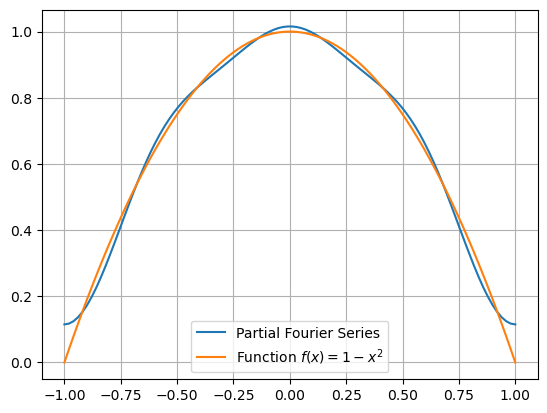

In [21]:
f = lambda x: 1 - x**2
L = 1
N = 3
a0,a,b = fourier(f,L,N)
x = np.linspace(-L,L,100)
y = fouriersum(a0,a,b,x,L)
plt.plot(x,y,label="Partial Fourier Series")
plt.plot(x,f(x),label="Function $f(x) = 1-x^2$")
plt.grid(True), plt.legend()
plt.show()

## Examples

### Sawtooth Wave

In [22]:
import scipy.signal as sps

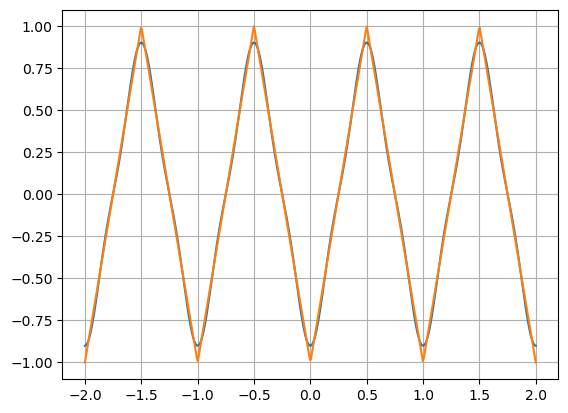

In [23]:
f = lambda x: sps.sawtooth(2*np.pi*x,width=0.5)
L = 2
a0,a,b = fourier(f,L,15)
x = np.linspace(-L,L,500)
y = fouriersum(a0,a,b,x,L)
plt.plot(x,y)
plt.plot(x,f(x))
plt.grid(True)
plt.show()

### Square Wave

In [ ]:
f = lambda x: sps.square(np.pi*x)
L = 1
N = 20
a0,a,b = fourier(f,L,N)
x = np.linspace(-L,L,500)
y = fouriersum(a0,a,b,x,L)
plt.plot(x,y)
plt.plot(x,f(x))
plt.grid(True)
plt.show()